In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
train= pd.read_csv('../input/feedback-prize-effectiveness/train.csv')
test= pd.read_csv('../input/feedback-prize-effectiveness/test.csv')
sub= pd.read_csv('../input/feedback-prize-effectiveness/sample_submission.csv')

In [3]:
train.head(30)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate
5,36a565e45db7,007ACE74B050,"though some say that life on Mars does exist, ...",Rebuttal,Ineffective
6,fb65fe816ba3,007ACE74B050,"It says in paragraph 7, on April 5, 1998, Mars...",Evidence,Adequate
7,4e472e2584fa,007ACE74B050,Everyone who thought it was made by alieans ev...,Counterclaim,Adequate
8,28a94d3ee425,007ACE74B050,Though people were not satified about how the ...,Concluding Statement,Adequate
9,d226f06362f5,00944C693682,Limiting the usage of cars has personal and pr...,Lead,Effective


In [4]:
train.shape

(36765, 5)

In [5]:
train.nunique()

discourse_id               36765
essay_id                    4191
discourse_text             36691
discourse_type                 7
discourse_effectiveness        3
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='discourse_effectiveness', ylabel='count'>

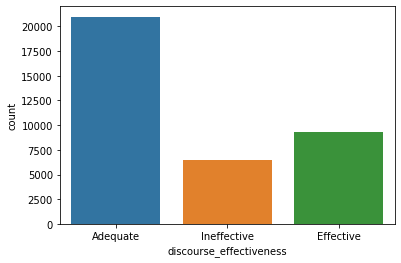

In [6]:
sns.countplot(train['discourse_effectiveness'])

* human tendency to giving average(adequate) rating to everybody
* try order of discourse_type- lead, position, claim, evidence, counterclaim, rebuttal, concluding statement
    evidence following a claim is more effective, can append position, claim, evidence when training claim
    lead- position
    claim-evidence
    counterclaim- rebuttal
    concluding_statement-position
    
* group by essay_id for splitting

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='discourse_type', ylabel='count'>

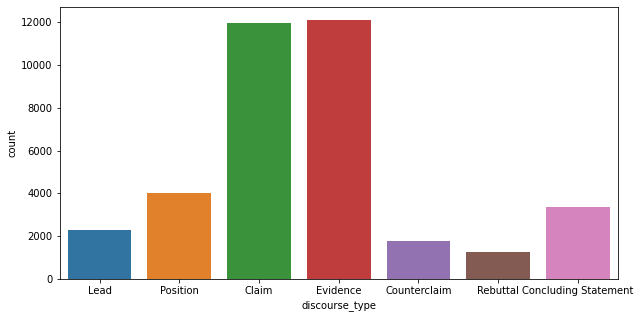

In [7]:
plt.figure(figsize= (10, 5))
sns.countplot(train['discourse_type'])

In [8]:
train[train['essay_id']== '00944C693682']

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
9,d226f06362f5,00944C693682,Limiting the usage of cars has personal and pr...,Lead,Effective
10,de347c859ab6,00944C693682,With so many things in this world that few peo...,Position,Effective
11,cc921c5cfda4,00944C693682,stress.,Claim,Adequate
12,a6fcdd9110ab,00944C693682,It is no secret that morning traffic jams and ...,Evidence,Effective
13,6efd9102298b,00944C693682,the environment suffers greatly from the many ...,Claim,Effective
14,d6807f31da92,00944C693682,"""Passenger cars are responsible for 12 percent...",Evidence,Effective
15,024f3edf0cdb,00944C693682,", adding the last two reasons together makes f...",Claim,Effective
16,cf5dc6eb65e0,00944C693682,"If it must be described as ""emissions ... are ...",Evidence,Adequate
17,8df2da9994bf,00944C693682,It is also worth noting that cities that have ...,Claim,Effective
18,033845420f01,00944C693682,"In Vauban, ""stores are placed a walk away, on ...",Evidence,Effective
